BREAST CANCER PREDICTION

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [105]:
df=pd.read_csv('C:/Users/shara/Desktop/python udemy course content/TensorFlow_FILES/DATA/cancer_classification.csv')

In [106]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

we have 569 entries for 31 columns in the dataset
we have to predict whether the sample case is cancer positive or cancer negative:
benign : 0
malign : 1
Hence this is a logistic regression problemm

In [108]:
df.head().transpose()

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


In [109]:
df.rename(columns={'benign_0__mal_1':'result'},inplace=True)

In [110]:
print(df.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'result'],
      dtype='object')


In [111]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
result                     0
dtype: int64

In [112]:
#normalizing the data
def normalizedf(df):
    for i in df.columns:
        maxval=df[i].max()
        minval=df[i].min()
        df[i]=df[i].apply(lambda x : (x-minval)/(maxval-minval))
    return df
    

In [113]:
dfnew=normalizedf(df)

In [114]:
dfnew.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0


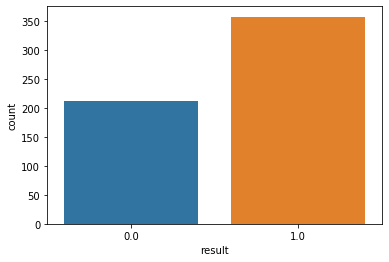

In [115]:
sns.countplot(x='result',data=df)

In [116]:
plt.figure(figsize=(12,12))
dfnew.corr().sort_values('result')['result']

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Figure size 864x864 with 0 Axes>

In [117]:
inputdata=dfnew.drop('result',axis=1).values
result=dfnew['result'].values

In [118]:
print('Input data shape: \n',inputdata.shape,'\ntype: \n',type(inputdata))

Input data shape: 
 (569, 30) 
type: 
 <class 'numpy.ndarray'>


In [119]:
from sklearn.model_selection import train_test_split

In [120]:
x_train, x_test, y_train, y_test = train_test_split(inputdata,result, test_size=0.2)

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [122]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [123]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [124]:
model.fit(x=x_train,y=y_train,epochs=600,validation_data=(x_test,y_test),callbacks=[early_stop])

Train on 455 samples, validate on 114 samples
Epoch 1/600
455/455 [==============================] - 1s 1ms/sample - loss: 0.7005 - val_loss: 0.6694
Epoch 2/600
455/455 [==============================] - 0s 72us/sample - loss: 0.6690 - val_loss: 0.6407
Epoch 3/600
455/455 [==============================] - 0s 93us/sample - loss: 0.6391 - val_loss: 0.6138
Epoch 4/600
455/455 [==============================] - 0s 94us/sample - loss: 0.6218 - val_loss: 0.5856
Epoch 5/600
455/455 [==============================] - 0s 237us/sample - loss: 0.5835 - val_loss: 0.5501
Epoch 6/600
455/455 [==============================] - 0s 184us/sample - loss: 0.5505 - val_loss: 0.5076
Epoch 7/600
455/455 [==============================] - 0s 99us/sample - loss: 0.5268 - val_loss: 0.4643
Epoch 8/600
455/455 [==============================] - 0s 94us/sample - loss: 0.4662 - val_loss: 0.4204
Epoch 9/600
455/455 [==============================] - 0s 100us/sample - loss: 0.4572 - val_loss: 0.3831
Epoch 10/600
455

455/455 [==============================] - 0s 101us/sample - loss: 0.1040 - val_loss: 0.0680
Epoch 79/600
455/455 [==============================] - 0s 97us/sample - loss: 0.0961 - val_loss: 0.0675
Epoch 80/600
455/455 [==============================] - 0s 110us/sample - loss: 0.0980 - val_loss: 0.0673
Epoch 81/600
455/455 [==============================] - 0s 114us/sample - loss: 0.0859 - val_loss: 0.0678
Epoch 82/600
455/455 [==============================] - 0s 114us/sample - loss: 0.0844 - val_loss: 0.0678
Epoch 83/600
455/455 [==============================] - 0s 110us/sample - loss: 0.0925 - val_loss: 0.0681
Epoch 84/600
455/455 [==============================] - 0s 108us/sample - loss: 0.0985 - val_loss: 0.0663
Epoch 85/600
455/455 [==============================] - 0s 110us/sample - loss: 0.0966 - val_loss: 0.0767
Epoch 86/600
455/455 [==============================] - 0s 112us/sample - loss: 0.0866 - val_loss: 0.0675
Epoch 87/600
455/455 [==============================] - 0s 1

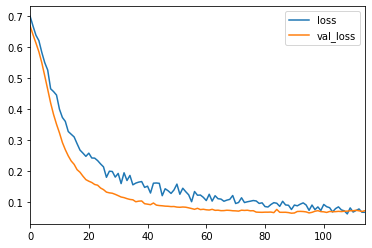

In [125]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [126]:
predictions=model.predict_classes(x_test)

In [127]:
correctno=(predictions.flatten()==y_test).sum()
print('total test cases:',len(y_test))
print('correctly predicted cases:',correctno)
print('accuracy: ',correctno/len(y_test)*100)

total test cases: 114
correctly predicted cases: 110
accuracy:  96.49122807017544


In [128]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        45
         1.0       0.96      0.99      0.97        69

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [129]:
model.save('model.h5')